In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('insurance_claims.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,FEMALE,Associate,sales,kayaking,husband,0,0,2015-02-26,Parked Car,?,Minor Damage,Police,WV,Columbus,1416 Cherokee Ridge,6,1,?,0,3,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


## EDA

In [4]:
df.shape

(1000, 40)

In [5]:
df = df.replace('?',np.nan)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [6]:
# list of columns not necessary for pfrediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']

In [7]:
# dropping the unnecessary columns
df.drop(columns=cols_to_drop,inplace=True)

In [8]:
df.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

### Categorical Features

In [10]:
cat_fea = [fea for fea in df.columns if df[fea].dtype == "O" and fea !="fraud_reported"]
print(len(cat_fea))
cat_fea

11


['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

In [11]:
# make a list of the categorical variables that contain missing values
cat_fea_with_na = [fea for fea in cat_fea if df[fea].isna().sum() > 0]

print(cat_fea_with_na)

# print percentage of missing values per variable
df[cat_fea_with_na].isna().mean().sort_values(ascending=False)

['collision_type', 'property_damage', 'police_report_available']


property_damage            0.360
police_report_available    0.343
collision_type             0.178
dtype: float64

In [12]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Importing the categorical imputer
from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [13]:
# imputing the missing values from the column

df['collision_type']=imputer.fit_transform(df['collision_type'])
df['property_damage']=imputer.fit_transform(df['property_damage'])
df['police_report_available']=imputer.fit_transform(df['police_report_available'])

In [14]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [15]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [16]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [17]:
# check that we have no missing information in the engineered variables

df[cat_fea_with_na].isna().sum()

collision_type             0
property_damage            0
police_report_available    0
dtype: int64

In [18]:
#mappings:

In [19]:
#unique labels in categorical features:
for i in df.columns:
    if df[i].dtypes =="O":
        uc = df[i].unique()
        print(i,':',uc,'\n')
        print("--------------------------------------------")

policy_csl : ['250/500' '100/300' '500/1000'] 

--------------------------------------------
insured_sex : ['MALE' 'FEMALE'] 

--------------------------------------------
insured_education_level : ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD'] 

--------------------------------------------
insured_occupation : ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing'] 

--------------------------------------------
insured_relationship : ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family'] 

--------------------------------------------
incident_type : ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car'] 

--------------------------------------------
collision_type : ['Side Collision' 'Rear Collision' 'Front Collision'] 

-------------------

### Numerical Features

In [20]:
# now let's identify the numerical variables

num_fea = [fea for fea in df.columns if df[fea].dtype != "O"]

print(num_fea)


# number of numerical variables
len(num_fea)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']


15

In [21]:
# make a list of the numerical variables that contain missing values
num_fea_with_na = [fea for fea in num_fea if df[fea].isna().sum() > 0]

print(num_fea_with_na)

# print percentage of missing values per variable
df[num_fea_with_na].isna().mean().sort_values(ascending=False)

[]


Series([], dtype: float64)

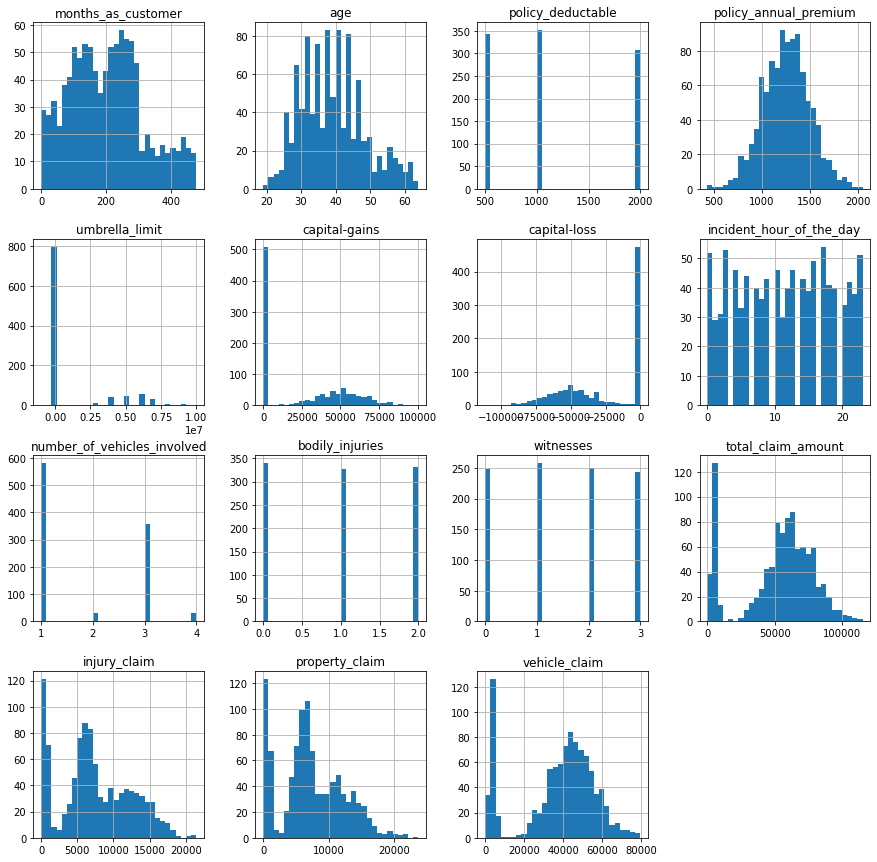

In [22]:
# lets plot histograms for all continuous variables

df[num_fea].hist(bins=30, figsize=(15,15))
plt.show()

In [23]:
num_fea

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim']

#### Number of labels: cardinality

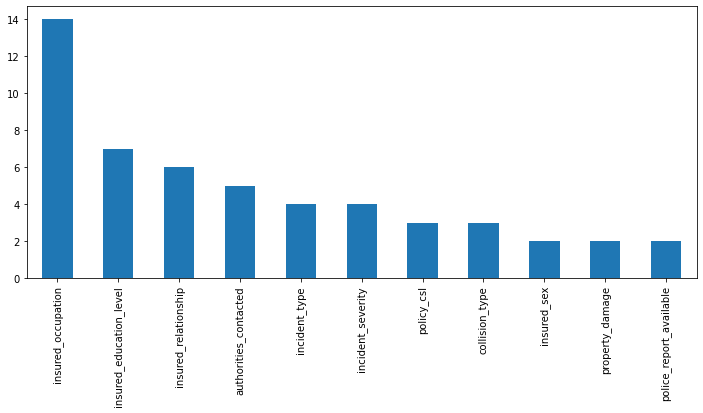

In [24]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

df[cat_fea].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5));

In [25]:
cat_fea

['policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'property_damage',
 'police_report_available']

In [26]:
# custom mapping for encoding
df['policy_csl'] = df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
df['insured_education_level'] = df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
df['incident_severity'] = df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
df['insured_sex'] = df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
df['property_damage'] = df['property_damage'].map({'NO' : 0, 'YES' : 1})
df['police_report_available'] = df['police_report_available'].map({'NO' : 0, 'YES' : 1})


In [27]:
#output variable:
df['fraud_reported'] = df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [28]:
from sklearn.preprocessing import LabelEncoder 

In [29]:
le = LabelEncoder()

In [30]:
df['insured_relationship']  = le.fit_transform(df['insured_relationship'])
df['incident_type']         = le.fit_transform(df['incident_type']) 
df['incident_type']         = le.fit_transform(df['incident_type'])
df['collision_type']        = le.fit_transform(df['collision_type'])
df['authorities_contacted'] = le.fit_transform(df['authorities_contacted'])
df['insured_occupation'] = le.fit_transform(df['insured_occupation'])

In [31]:
df

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2.5,1000,1406.91,0,1,6,2,0,53300,0,2,2,3,4,5,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,2.5,2000,1197.22,5000000,1,6,6,2,0,0,3,1,2,4,8,1,0,0,0,0,5070,780,780,3510,1
2,134,29,1.0,2000,1413.14,5000000,0,7,11,3,35100,0,0,1,2,4,7,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,2.5,2000,1415.74,6000000,0,7,1,4,48900,-62400,2,0,3,4,5,1,0,1,2,0,63400,6340,6340,50720,1
4,228,44,5.0,1000,1583.91,6000000,1,5,11,4,66000,-46000,3,1,2,2,20,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,5.0,1000,1310.80,0,0,4,2,4,0,0,2,0,2,1,20,1,1,0,1,0,87200,17440,8720,61040,0
996,285,41,1.0,1000,1436.79,0,0,7,9,5,70900,0,2,1,3,1,23,1,1,2,3,0,108480,18080,18080,72320,0
997,130,34,2.5,500,1383.49,3000000,0,4,1,2,35100,0,0,2,2,4,4,3,0,2,3,1,67500,7500,7500,52500,0
998,458,62,5.0,2000,1356.92,5000000,1,5,5,5,0,0,2,1,3,3,2,1,0,0,1,1,46980,5220,5220,36540,0


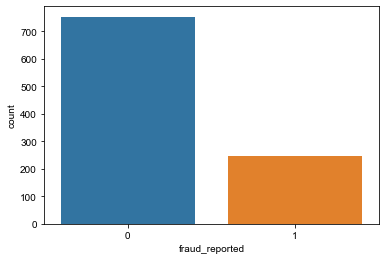

In [32]:
#visualizing output feature:
sns.countplot(x='fraud_reported',data=df)
sns.set(palette='cubehelix')

In [41]:
X = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

In [42]:
X #independant features

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,2.5,1000,1406.91,0,1,6,2,0,53300,0,2,2,3,4,5,1,1,1,2,1,71610,6510,13020,52080
1,228,42,2.5,2000,1197.22,5000000,1,6,6,2,0,0,3,1,2,4,8,1,0,0,0,0,5070,780,780,3510
2,134,29,1.0,2000,1413.14,5000000,0,7,11,3,35100,0,0,1,2,4,7,3,0,2,3,0,34650,7700,3850,23100
3,256,41,2.5,2000,1415.74,6000000,0,7,1,4,48900,-62400,2,0,3,4,5,1,0,1,2,0,63400,6340,6340,50720
4,228,44,5.0,1000,1583.91,6000000,1,5,11,4,66000,-46000,3,1,2,2,20,1,0,0,1,0,6500,1300,650,4550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,5.0,1000,1310.80,0,0,4,2,4,0,0,2,0,2,1,20,1,1,0,1,0,87200,17440,8720,61040
996,285,41,1.0,1000,1436.79,0,0,7,9,5,70900,0,2,1,3,1,23,1,1,2,3,0,108480,18080,18080,72320
997,130,34,2.5,500,1383.49,3000000,0,4,1,2,35100,0,0,2,2,4,4,3,0,2,3,1,67500,7500,7500,52500
998,458,62,5.0,2000,1356.92,5000000,1,5,5,5,0,0,2,1,3,3,2,1,0,0,1,1,46980,5220,5220,36540


In [43]:
y #dependent featrure

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [50]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [51]:
os =  RandomOverSampler(random_state=1,sampling_strategy='auto')
X_os, y_os = os.fit_resample(X,y)
X_os.shape,y_os.shape

((1506, 26), (1506,))

In [52]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_os)))

Original dataset shape Counter({0: 753, 1: 247})
Resampled dataset shape Counter({1: 753, 0: 753})


In [121]:
df_os = pd.concat([X_os,y_os],axis=1)
df_os

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2.5,1000,1406.91,0,1,6,2,0,53300,0,2,2,3,4,5,1,1,1,2,1,71610,6510,13020,52080,1
1,228,42,2.5,2000,1197.22,5000000,1,6,6,2,0,0,3,1,2,4,8,1,0,0,0,0,5070,780,780,3510,1
2,134,29,1.0,2000,1413.14,5000000,0,7,11,3,35100,0,0,1,2,4,7,3,0,2,3,0,34650,7700,3850,23100,0
3,256,41,2.5,2000,1415.74,6000000,0,7,1,4,48900,-62400,2,0,3,4,5,1,0,1,2,0,63400,6340,6340,50720,1
4,228,44,5.0,1000,1583.91,6000000,1,5,11,4,66000,-46000,3,1,2,2,20,1,0,0,1,0,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,271,44,2.5,500,1340.71,0,0,2,12,2,0,0,2,1,2,3,16,1,0,2,2,0,76230,6930,13860,55440,1
1502,203,38,2.5,500,1394.43,0,0,4,7,1,0,0,2,0,3,0,7,1,0,0,1,1,55440,0,6160,49280,1
1503,231,37,2.5,500,920.81,0,0,2,11,5,0,0,2,1,3,1,14,1,1,2,0,0,71190,0,7910,63280,1
1504,252,39,5.0,500,1312.22,9000000,1,2,13,2,0,-33300,0,0,2,3,15,3,0,0,3,0,59400,11880,5940,41580,1


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train,X_test,y_train,y_test =train_test_split(X_os,y_os,test_size=0.3,random_state=1)
print("The shape of training data :",X_train.shape,y_train.shape)
print("The shape of testing data :", X_test.shape,y_test.shape)

The shape of training data : (1054, 26) (1054,)
The shape of testing data : (452, 26) (452,)


In [55]:
X_train

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
612,56,42,2.5,500,1339.39,0,0,5,0,1,0,0,2,1,4,3,13,1,0,1,2,1,61490,11180,11180,39130
692,137,35,2.5,500,1667.83,0,1,1,9,0,48500,-67400,1,1,2,4,4,1,1,1,1,0,6600,1200,1200,4200
490,191,33,5.0,2000,1551.61,0,1,2,1,4,45000,-30400,3,1,2,2,3,1,1,1,1,0,2250,250,250,1750
1126,147,37,5.0,2000,1375.29,0,0,4,1,3,0,0,0,2,3,0,11,3,0,0,1,0,56160,6240,6240,43680
927,156,32,2.5,500,1479.48,0,1,4,9,4,0,0,2,0,3,3,15,1,1,1,3,1,74690,6790,13580,54320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,96,29,2.5,1000,1274.70,5000000,1,3,9,2,47500,-58700,0,1,3,0,15,3,1,2,3,1,55400,5540,11080,38780
905,121,31,1.0,1000,1140.91,0,1,5,0,2,51300,0,0,2,3,1,15,3,0,1,2,0,64300,6430,6430,51440
1096,142,33,1.0,2000,1362.64,5000000,0,1,3,5,0,0,2,2,4,3,11,1,1,1,3,0,81360,6780,13560,61020
235,428,54,1.0,2000,1506.21,0,1,4,13,4,0,-24400,0,2,2,1,16,3,0,1,0,0,76560,12760,6380,57420


In [56]:
X_test

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
680,222,38,1.0,2000,1157.97,0,1,6,6,1,0,-64500,2,0,4,4,20,1,0,2,2,1,60480,6720,6720,47040
559,194,38,1.0,2000,1231.25,0,0,7,2,1,46500,0,0,1,2,0,15,3,0,1,0,0,53680,4880,9760,39040
924,135,30,5.0,2000,1341.24,0,0,6,4,5,37100,-46500,0,1,2,0,18,3,0,0,1,0,32670,5940,2970,23760
1106,253,41,1.0,2000,1312.75,0,0,7,11,2,81300,0,0,1,3,3,10,3,0,2,2,1,80740,7340,14680,58720
516,65,27,1.0,1000,1164.97,0,0,3,0,5,43000,-42500,2,0,4,0,17,1,0,1,2,1,42840,3570,7140,32130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,258,41,1.0,500,1042.25,0,1,4,3,4,0,-44400,0,1,3,1,0,3,0,2,3,0,81240,6770,20310,54160
1318,290,45,1.0,500,1085.03,0,0,1,11,5,0,-61000,0,2,4,4,23,3,1,2,2,0,64800,12960,6480,45360
1286,113,29,2.5,2000,1091.73,0,1,7,3,1,36100,-42300,0,1,2,3,15,3,0,0,2,1,49950,5550,5550,38850
1494,325,47,5.0,1000,1690.27,0,0,5,10,1,61500,0,2,2,3,1,11,1,1,0,3,0,72930,6630,6630,59670


In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
df_norm = MinMaxScaler()
X_train_norm = df_norm.fit_transform(X_train.iloc[:,:26])  #Normalizing X_train data:
X_train_norm = pd.DataFrame(X_train_norm,columns=df.columns[:-1])
X_train_norm

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.116910,0.511111,0.375,0.000000,0.530813,0.090909,0.0,0.666667,0.000000,0.2,0.000000,1.000000,0.666667,0.5,1.000000,0.75,0.565217,0.000000,0.0,0.5,0.666667,1.0,0.534663,0.524144,0.472328,0.491383
1,0.286013,0.355556,0.375,0.000000,0.748407,0.090909,1.0,0.000000,0.692308,0.0,0.490891,0.279915,0.333333,0.5,0.333333,1.00,0.173913,0.000000,1.0,0.5,0.333333,0.0,0.056610,0.056259,0.050697,0.051956
2,0.398747,0.311111,1.000,1.000000,0.671410,0.090909,1.0,0.166667,0.076923,0.8,0.455466,0.675214,1.000000,0.5,0.333333,0.50,0.130435,0.000000,1.0,0.5,0.333333,0.0,0.018725,0.011721,0.010562,0.021135
3,0.306889,0.400000,1.000,1.000000,0.554597,0.090909,0.0,0.500000,0.076923,0.6,0.000000,1.000000,0.000000,1.0,0.666667,0.00,0.478261,0.666667,0.0,0.0,0.333333,0.0,0.488242,0.292546,0.263625,0.548622
4,0.325678,0.288889,0.375,0.000000,0.623624,0.090909,1.0,0.500000,0.692308,0.8,0.000000,1.000000,0.666667,0.0,0.666667,0.75,0.652174,0.000000,1.0,0.5,1.000000,1.0,0.649626,0.318331,0.573722,0.682476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0.200418,0.222222,0.375,0.333333,0.487956,0.545455,1.0,0.333333,0.692308,0.4,0.480769,0.372863,0.000000,0.5,0.666667,0.00,0.652174,0.666667,1.0,1.0,1.000000,1.0,0.481623,0.259728,0.468103,0.486979
1050,0.252610,0.266667,0.000,0.333333,0.399319,0.090909,1.0,0.666667,0.000000,0.4,0.519231,1.000000,0.000000,1.0,0.666667,0.25,0.652174,0.666667,0.0,0.5,0.666667,0.0,0.559136,0.301453,0.271652,0.646245
1051,0.296451,0.311111,0.000,1.000000,0.546216,0.545455,0.0,0.000000,0.230769,1.0,0.000000,1.000000,0.666667,1.0,1.000000,0.75,0.478261,0.000000,1.0,0.5,1.000000,0.0,0.707716,0.317862,0.572877,0.766763
1052,0.893528,0.777778,0.000,1.000000,0.641332,0.090909,1.0,0.500000,1.000000,0.8,0.000000,0.739316,0.000000,1.0,0.333333,0.25,0.695652,0.666667,0.0,0.5,0.000000,0.0,0.665912,0.598218,0.269540,0.721474


In [59]:
X_test_norm = df_norm.transform(X_test.iloc[:,:26])  #Normalizing X_test data:
X_test_norm = pd.DataFrame(X_test_norm,columns=df.columns[:-1])
X_test_norm

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,0.463466,0.422222,0.000,1.000000,0.410621,0.090909,1.0,0.833333,0.461538,0.2,0.000000,0.310897,0.666667,0.0,1.000000,1.00,0.869565,0.000000,0.0,1.0,0.666667,1.0,0.525867,0.315049,0.283904,0.590892
1,0.405010,0.422222,0.000,1.000000,0.459170,0.090909,0.0,1.000000,0.153846,0.2,0.470648,1.000000,0.000000,0.5,0.333333,0.00,0.652174,0.666667,0.0,0.5,0.000000,0.0,0.466643,0.228786,0.412336,0.490250
2,0.281837,0.244444,1.000,1.000000,0.532039,0.090909,0.0,0.833333,0.307692,1.0,0.375506,0.503205,0.000000,0.5,0.333333,0.00,0.782609,0.666667,0.0,0.0,0.333333,0.0,0.283661,0.278481,0.125475,0.298025
3,0.528184,0.488889,0.000,1.000000,0.513164,0.090909,0.0,1.000000,0.846154,0.4,0.822874,1.000000,0.000000,0.5,0.666667,0.75,0.434783,0.666667,0.0,1.0,0.666667,1.0,0.702317,0.344116,0.620194,0.737829
4,0.135699,0.177778,0.000,0.333333,0.415259,0.090909,0.0,0.333333,0.000000,1.0,0.435223,0.545940,0.666667,0.0,1.000000,0.00,0.739130,0.000000,0.0,0.5,0.666667,1.0,0.372235,0.167370,0.301648,0.403321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.538622,0.488889,0.000,0.000000,0.333956,0.090909,1.0,0.500000,0.230769,0.8,0.000000,0.525641,0.000000,0.5,0.666667,0.25,0.000000,0.666667,0.0,1.0,1.000000,0.0,0.706671,0.317393,0.858048,0.680463
448,0.605428,0.577778,0.000,0.000000,0.362298,0.090909,0.0,0.000000,0.846154,1.0,0.000000,0.348291,0.000000,1.0,1.000000,1.00,1.000000,0.666667,1.0,1.0,0.666667,0.0,0.563491,0.607595,0.273764,0.569757
449,0.235908,0.222222,0.375,1.000000,0.366737,0.090909,1.0,1.000000,0.230769,0.2,0.365385,0.548077,0.000000,0.5,0.333333,0.75,0.652174,0.666667,0.0,0.0,0.666667,1.0,0.434158,0.260197,0.234474,0.487860
450,0.678497,0.622222,1.000,0.333333,0.763273,0.090909,0.0,0.666667,0.769231,0.2,0.622470,1.000000,0.666667,1.0,0.666667,0.25,0.478261,0.000000,1.0,0.0,1.000000,0.0,0.634297,0.310830,0.280101,0.749780


## Feature Selection

In [60]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [61]:
selector = SelectFromModel(estimator=LogisticRegression(random_state=1))

In [62]:
selector.fit(X_train_norm,y_train)

SelectFromModel(estimator=LogisticRegression(random_state=1))

In [63]:
selector.get_support().sum()

9

In [64]:
# let's visualise those features that were selected.
# (selected features marked with True)
selector.get_support()

array([ True,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True, False,  True])

In [65]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train_norm.columns[(selector.get_support())]

# let's print some stats
print('total features: {}'.format((X_train_norm.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    sum(selector.estimator_.coef_)))

total features: 26
selected features: 9
features with coefficients shrank to zero: [ 0.62016914 -0.75147655 -0.05241637  0.07709735  0.10609471  0.52187452
  0.12041158 -0.04415447 -0.16064378  0.24761516 -0.16624688  0.16540645
  0.104817   -0.04503105  0.51123353 -0.26041198  0.15086728  0.0907349
 -0.04666436  0.36878184  0.11825919 -0.33379312  0.69108823 -0.31646617
 -0.15135072  1.1281722 ]


In [66]:
print(len(selected_feats))
selected_feats

9


Index(['months_as_customer', 'age', 'umbrella_limit', 'incident_severity',
       'bodily_injuries', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'vehicle_claim'],
      dtype='object')

In [67]:
# reduce the train and test set to the selected features

X_train_final = X_train_norm[selected_feats]
X_test_final  = X_test_norm[selected_feats]

In [68]:
print("The shape of training data :",X_train_final.shape,y_train.shape)  
print("The shape of testing data :" ,X_test_final.shape,y_test.shape)


The shape of training data : (1054, 9) (1054,)
The shape of testing data : (452, 9) (452,)


In [118]:
X_kf = pd.concat([X_train_final,X_test_final],axis=0)
X_kf

,months_as_customer,age,umbrella_limit,incident_severity,bodily_injuries,police_report_available,total_claim_amount,injury_claim,vehicle_claim
0,0.116910,0.511111,0.090909,1.000000,0.5,1.0,0.534663,0.524144,0.491383
1,0.286013,0.355556,0.090909,0.333333,0.5,0.0,0.056610,0.056259,0.051956
2,0.398747,0.311111,0.090909,0.333333,0.5,0.0,0.018725,0.011721,0.021135
3,0.306889,0.400000,0.090909,0.666667,0.0,0.0,0.488242,0.292546,0.548622
4,0.325678,0.288889,0.090909,0.666667,0.5,1.0,0.649626,0.318331,0.682476
...,...,...,...,...,...,...,...,...,...
447,0.538622,0.488889,0.090909,0.666667,1.0,0.0,0.706671,0.317393,0.680463
448,0.605428,0.577778,0.090909,1.000000,1.0,0.0,0.563491,0.607595,0.569757
449,0.235908,0.222222,0.090909,0.333333,0.0,1.0,0.434158,0.260197,0.487860
450,0.678497,0.622222,0.090909,0.666667,0.0,0.0,0.634297,0.310830,0.749780


In [70]:
y_kf =pd.concat([y_train,y_test],axis=0)
y_kf

612     0
692     0
490     0
1126    1
927     1
       ..
1330    1
1318    1
1286    1
1494    1
1207    1
Name: fraud_reported, Length: 1506, dtype: int64

In [71]:
y_kf.shape

(1506,)

## Model Training:

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [74]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### 1) Decision Tree:

In [75]:
dt_model = DecisionTreeClassifier(random_state=1,criterion='gini',max_depth=4,min_samples_split=2)
dt_model.fit(X_train_final,y_train)
y_pred_dt = dt_model.predict(X_train_final)

In [76]:
#training accuracy
dt_1 =accuracy_score(y_train,y_pred_dt)
dt_1

0.8055028462998103

In [77]:
y_pred_dt_test = dt_model.predict(X_test_final)

#testing accuracy
dt_2=accuracy_score(y_test,y_pred_dt_test)
dt_2

0.7234513274336283

## 2) Random Forest

In [78]:
rf_model = RandomForestClassifier(random_state=1,n_estimators=30, max_depth=None, min_samples_split=2)
rf_model.fit(X_train_final,y_train)
y_pred_rf = dt_model.predict(X_train_final)

In [79]:
#training accuracy
rf_1=accuracy_score(y_train,y_pred_rf)
rf_1

0.8055028462998103

In [80]:
y_pred_rf_test = rf_model.predict(X_test_final)

#testing accuracy
rf_2=accuracy_score(y_test,y_pred_rf_test)
rf_2

0.8672566371681416

## 3)Xtreme GB:

In [81]:
xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train_final,y_train)
y_pred_xgb = xgb_model.predict(X_train_final)

In [82]:
#training accuracy
xgb_1=accuracy_score(y_train,y_pred_xgb)
xgb_1

1.0

In [83]:
y_pred_xgb_test = xgb_model.predict(X_test_final)

#testing accuracy
xgb_2=accuracy_score(y_test,y_pred_xgb_test)
xgb_2

0.8429203539823009

## 4) LightGB:

In [84]:
lgb_model = LGBMClassifier(random_state=1,n_estimators=100)
lgb_model.fit(X_train_final,y_train)
y_pred_lgb = lgb_model.predict(X_train_final)

In [85]:
#training accuracy
lgb_1=accuracy_score(y_train,y_pred_lgb)
lgb_1

1.0

In [86]:
y_pred_lgb_test = lgb_model.predict(X_test_final)

#testing accuracy
lgb_2=accuracy_score(y_test,y_pred_lgb_test)
lgb_2

0.8584070796460177

## 5) KNN:

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_final,y_train)
y_pred_knn = knn_model.predict(X_train_final)

In [88]:
#training accuracy
knn_1=accuracy_score(y_train,y_pred_knn)
knn_1

0.8918406072106262

In [89]:
y_pred_knn_test = knn_model.predict(X_test_final)

#testing accuracy
knn_2=accuracy_score(y_test,y_pred_knn_test)
knn_2

0.7699115044247787

## 6) SVM:

In [90]:
svm_model=SVC(random_state=1,kernel='rbf')
svm_model.fit(X_train_final,y_train)
y_pred_svm = svm_model.predict(X_train_final)

In [91]:
#training accuracy
svm_1=accuracy_score(y_train,y_pred_svm)
svm_1

0.8026565464895635

In [92]:
y_pred_svm_test = knn_model.predict(X_test_final)

#testing accuracy
svm_2=accuracy_score(y_test,y_pred_svm_test)
svm_2

0.7699115044247787

### K Fold Cross Validation


In [93]:
from sklearn.model_selection import KFold

kfold_validation=KFold(10)

In [94]:
from sklearn.model_selection import cross_val_score
results=cross_val_score(dt_model,X_kf,y_kf,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.7218543  0.72847682 0.78807947 0.78807947 0.75496689 0.78807947
 0.78666667 0.74       0.69333333 0.76      ]
0.754953642384106


### Stratified K-fold Cross Validation


In [95]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)

scores=cross_val_score(dt_model,X_kf,y_kf,cv=skfold)

print(scores)
print(np.mean(scores))

[0.72847682 0.79401993 0.73754153 0.79401993 0.7076412 ]
0.7523398825108357


In [96]:
model_comparisons =pd.DataFrame( {'Models':['Decision Tree','Random Forest','Xtrem GB','Light Gb','KNN','SVM'],
                    'Train_Accuracy':[dt_1,rf_1,xgb_1,lgb_1,knn_1,svm_1],
                    'Test_Accuracy':[dt_2,rf_2,xgb_2,lgb_2,knn_2,svm_2]})
model_comparisons

,Models,Train_Accuracy,Test_Accuracy
0,Decision Tree,0.805503,0.723451
1,Random Forest,0.805503,0.867257
2,Xtrem GB,1.000000,0.842920
3,Light Gb,1.000000,0.858407
4,KNN,0.891841,0.769912
5,SVM,0.802657,0.769912


In [97]:
import pickle

In [98]:
#loading the model
pickle.dump(dt_model,open('dt_model.pkl','wb'))

In [99]:
#reading the model
pickled_model = pickle.load(open('dt_model.pkl','rb'))

In [100]:
#loading the minmax scaler
pickle.dump(df_norm,open('scaler.pkl','wb'))

In [102]:
#loading the model
pickle.dump(dt_model,open('rf_model.pkl','wb'))

## Testing Data Prediction

In [122]:
selected_feats

Index(['months_as_customer', 'age', 'umbrella_limit', 'incident_severity',
       'bodily_injuries', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'vehicle_claim'],
      dtype='object')

In [123]:
X_for_test = df_os[selected_feats]  #Only 9 features selected after feature selection
X_for_test

,months_as_customer,age,umbrella_limit,incident_severity,bodily_injuries,police_report_available,total_claim_amount,injury_claim,vehicle_claim
0,328,48,0,3,1,1,71610,6510,52080
1,228,42,5000000,2,0,0,5070,780,3510
2,134,29,5000000,2,2,0,34650,7700,23100
3,256,41,6000000,3,1,0,63400,6340,50720
4,228,44,6000000,2,0,0,6500,1300,4550
...,...,...,...,...,...,...,...,...,...
1501,271,44,0,2,2,0,76230,6930,55440
1502,203,38,0,3,0,1,55440,0,49280
1503,231,37,0,3,2,0,71190,0,63280
1504,252,39,9000000,2,0,0,59400,11880,41580


In [105]:
minmax = MinMaxScaler()
minmax = minmax.fit(X_for_test)

In [117]:
#Test:1
input_data=(328,48,0,3,1,1,71610,6510,52080)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_transfer = minmax.transform(input_data_reshaped)

Prediction = dt_model.predict(input_data_transfer)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[1]
The claim is Fraudulent


In [131]:
#Test2
input_data=(295,42,5000000,4,0,0,59130,6570,45990)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_transfer = minmax.transform(input_data_reshaped)

Prediction = dt_model.predict(input_data_transfer)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[1]
The claim is Fraudulent


In [125]:
#Test3:
input_data=(134,29,5000000,2,2,0,34650,7700,23100)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_trasnf = minmax.transform(input_data_reshaped)


Prediction = dt_model.predict(input_data_trasnf)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[0]
The claim is not Fraudulent


In [129]:
#Test4:
input_data=(228,44,6000000,2,0,0,6500,1300,4550)

# changing the input_data to numpy array
input_data_as_np_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

#Normalizing the data as we build model like this
input_data_transfer = minmax.transform(input_data_reshaped)

Prediction = dt_model.predict(input_data_transfer)
print(Prediction)

if Prediction == 1:
    print('The claim is Fraudulent')
else:
    print('The claim is not Fraudulent')

[0]
The claim is not Fraudulent


In [127]:
#loading the minmax scaler2
pickle.dump(minmax,open('minmax.pkl','wb'))

In [130]:
pickled_model.predict(input_data_transfer)  #examing with test4..it gave correct output

array([0], dtype=int64)